# A. Exploratory Data Analysis: Prime Indian Diabetes dataset

**Objective**

Predict whether patient has diabetes or not based on different features.
n

**Data Set Information**

The dataset includes 769 rows and 7 columns containing different attributes of a person.


**Attribute Information**
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)

- DiabetesPedigreeFunction:Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

## 0. Required Imports

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from scipy import stats

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

## A.1. Problem Statement

Predict whether a person is diabetic positive or not based on different features.

## A.2. Data Collection

In [12]:
df = pd.read_csv('../Diabetes-Predictor/pime_indians_diabetes.csv')

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## A.3. Data Preprocessing

In [15]:
df.shape

(768, 9)

we got 768 rows and 9 columns or features

### A.3.1 Removing Null values

Visualizing the null values

<AxesSubplot:>

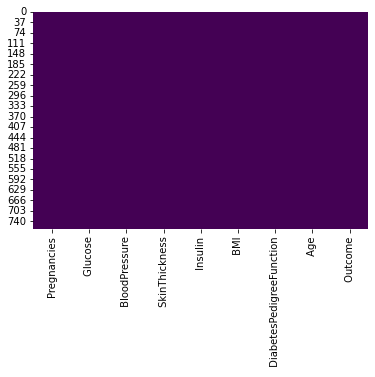

In [16]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

Fetching the indexes of the null values

In [17]:
null_val_indexes = [i for i, row in df.iterrows() if row.isnull().any()]

In [18]:
null_val_indexes

[]

**Observation:** We can observe that we have no column in any of the rows with null value.

### A.3.2 Removing Nan values

Visualizing the Nan values

<AxesSubplot:>

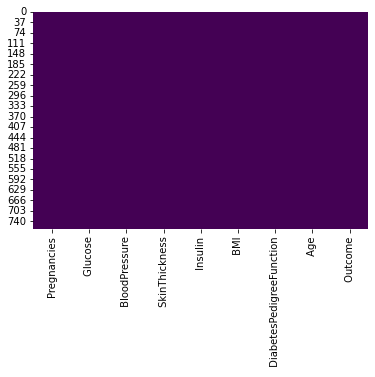

In [21]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

Fetching the indexes of Nan Values

In [23]:
nan_val_indexes = [i for i, row in df.iterrows() if row.isna().any()]

In [24]:
nan_val_indexes

[]

**Observation:** We can observe that we have no column in any of the rows with NaN value.

### A.3.3 Fixing the column names

Remove spaces from the colum heads

In [29]:
df.columns

Index(['Pregnancies', ' Glucose', ' BloodPressure', ' SkinThickness',
       ' Insulin', ' BMI', ' DiabetesPedigreeFunction', ' Age', ' Outcome'],
      dtype='object')

Their are spaces in column names so we need to remove them but before that we need to convert all the columns to string type first.

In [30]:
df = df.astype(str)

In [32]:
df.columns = [col_name.strip() for col_name in df.columns]

In [33]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### A.3.4 Fixing the data types of columns

Currently data types of respective columns are as follows

In [35]:
df.dtypes

Pregnancies                 object
Glucose                     object
BloodPressure               object
SkinThickness               object
Insulin                     object
BMI                         object
DiabetesPedigreeFunction    object
Age                         object
Outcome                     object
dtype: object

We will change the data types of columns to our custom type as we have previously altered them.

In [140]:
custom_dtypes = {'Pregnancies': 'int64', 'Glucose': 'int64', 'BloodPressure': 'int64', 'SkinThickness': 'int64', 'Insulin': 'int64', 'BMI': 'float64', 'DiabetesPedigreeFunction': 'float64', 'Age': 'int64', 'Outcome': 'int64'}

df = df.astype(custom_dtypes)

In [141]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### A.4 Detection and removal of outliers

### A.4.1 Detecting outliers by Box plot

We can only detect outliers in numerical features.

In [142]:
num_columns = [column for column in df.columns if df[column].dtypes != 'O']

In [143]:
num_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

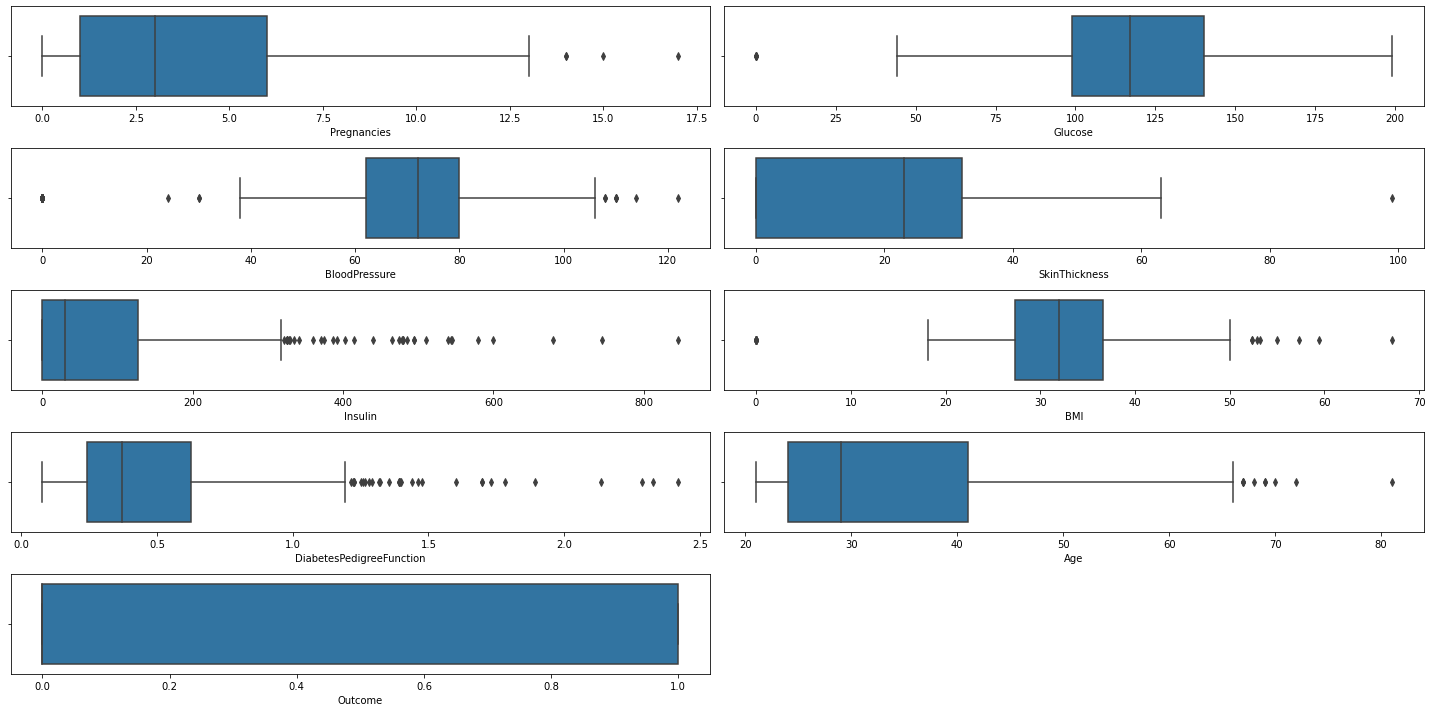

In [144]:
n = 1
plt.figure(figsize=(20, 10))
for column in num_columns:
    plt.subplot(5, 2, n)
    n+= 1
    sns.boxplot(df[column])
    plt.tight_layout()

### A.4.2 Detecting outliers by z-score

In [145]:
z_scores = []
for column in num_columns:
    z_scores.append(np.abs(stats.zscore(df[column])))

In [146]:
z_scores

[0      0.639947
 1      0.844885
 2      1.233880
 3      0.844885
 4      1.141852
          ...   
 763    1.827813
 764    0.547919
 765    0.342981
 766    0.844885
 767    0.844885
 Name: Pregnancies, Length: 768, dtype: float64,
 0      0.848324
 1      1.123396
 2      1.943724
 3      0.998208
 4      0.504055
          ...   
 763    0.622642
 764    0.034598
 765    0.003301
 766    0.159787
 767    0.873019
 Name: Glucose, Length: 768, dtype: float64,
 0      0.149641
 1      0.160546
 2      0.263941
 3      0.160546
 4      1.504687
          ...   
 763    0.356432
 764    0.046245
 765    0.149641
 766    0.470732
 767    0.046245
 Name: BloodPressure, Length: 768, dtype: float64,
 0      0.907270
 1      0.530902
 2      1.288212
 3      0.154533
 4      0.907270
          ...   
 763    1.722735
 764    0.405445
 765    0.154533
 766    1.288212
 767    0.656358
 Name: SkinThickness, Length: 768, dtype: float64,
 0      0.692891
 1      0.692891
 2      0.692891
 3   

Lets set the threshold to 3 and identify the outliers.

In [147]:
threshold = 3 
for z in z_scores:
    print(np.where(z > threshold))

(array([ 88, 159, 298, 455], dtype=int64),)
(array([ 75, 182, 342, 349, 502], dtype=int64),)
(array([  7,  15,  49,  60,  78,  81, 172, 193, 222, 261, 266, 269, 300,
       332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533,
       535, 589, 601, 604, 619, 643, 697, 703, 706], dtype=int64),)
(array([579], dtype=int64),)
(array([  8,  13, 111, 153, 186, 220, 228, 247, 286, 370, 409, 415, 486,
       584, 645, 655, 695, 753], dtype=int64),)
(array([  9,  49,  60,  81, 145, 177, 371, 426, 445, 494, 522, 673, 684,
       706], dtype=int64),)
(array([  4,  45,  58, 228, 330, 370, 371, 395, 445, 593, 621], dtype=int64),)
(array([123, 453, 459, 666, 684], dtype=int64),)
(array([], dtype=int64),)


**Observation:** 

Here we can observe the row numbers where value of z-score is greater than threshold for respective numerical features.

Now we will calculate the IQR for each of numerical features.

In [148]:
feature_IQRs = []

for column in num_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    feature_IQRs.append(IQR)

In [149]:
for column, IQR in zip(num_columns, feature_IQRs):
    print(column + '------------->' + str(IQR))

Pregnancies------------->5.0
Glucose------------->41.25
BloodPressure------------->18.0
SkinThickness------------->32.0
Insulin------------->127.25
BMI------------->9.3
DiabetesPedigreeFunction------------->0.38249999999999995
Age------------->17.0
Outcome------------->1.0


We can also calculate lower_fence and upper_fence using the IQR to remove the outliers in later stage.

lower_fence = Q1 - 1.5 * IQR

higher_fence = Q3 + 1.5 * IQR

### A.4.3 Removing outliers by z-score

Remove outliers from all the numerical column using z score.

In [150]:
df_processed = df[np.abs(stats.zscore(df[num_columns]) < 3).all(axis=1)]

In [151]:
df_processed.shape

(729, 9)

## A.5 Feature segregation

Categorical Features in dataset are 

In [152]:
cat_features = [feature for feature in df.columns if df_processed[feature].dtype == 'O']

In [153]:
cat_features

[]

Numerical features in dataset are

In [154]:
num_features = [feature for feature in df.columns if df_processed[feature].dtype != 'O']

In [155]:
num_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

Lets make data frame of categorical and numerical data frame for future references

In [156]:
cat_df = df_processed.filter(cat_features)

In [157]:
num_df = df_processed.filter(num_features)

## A.6 Bivariate Analysis

### A.6.1 Correaltion of numerical features

<AxesSubplot:>

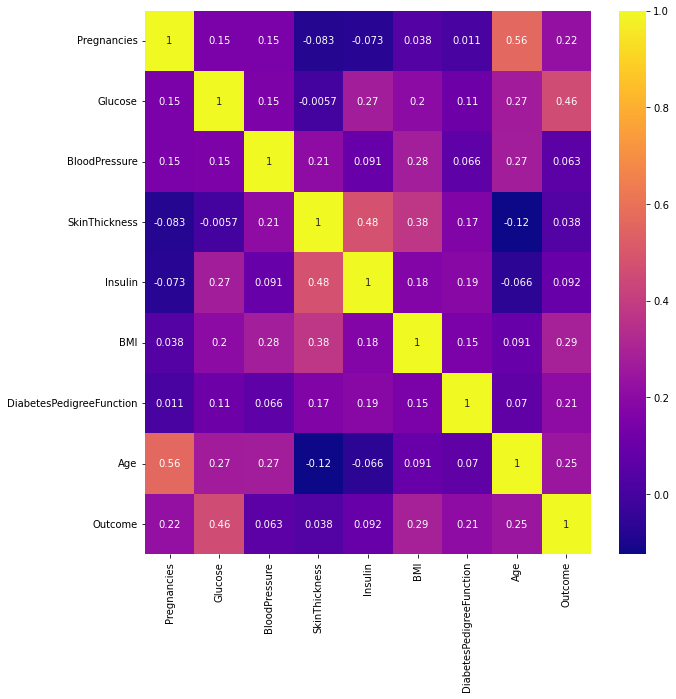

In [158]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_processed.corr(), cbar=True, annot=True, cmap='plasma')

**Observation:**

We can observe that:

- Their is high positive correlation between:
     - Pregnancies and age
     - Skin Thickness and Insulin 
     - Skin Thickness and BMI

- Their is moderate correlation between:
     - Glucose and Insulin
     - Glucose and Age
     - Blood Pressure and Skin Thickness
     - Blood Pressure and BMI
     - Blood Pressure and Age

- Their is negative correlation between:
     - Pregnancies and Skin Thickness
     - Skin Thickness and Age
     - Age and Insulin

### A.6.2 Relation between Categorical features

<AxesSubplot:xlabel='count', ylabel='Outcome'>

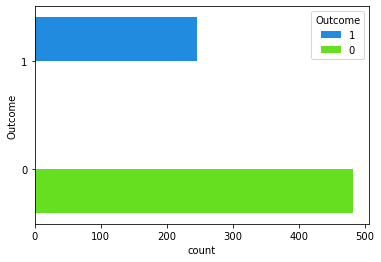

In [ ]:
sns.countplot(data=cat_df, y='Outcome', hue='Outcome', palette='gist_rainbow_r')

**Observations:** In our dataset Diabetes negative is encoded as 0 and represented by green and Diabetes positive is encoded as 1 and represented by blue.

- Number of Diabetes positive: 246
- Number of Diabetes negatives: 483

## A.7 Univariate Analysis

Lets check the distribution of the features

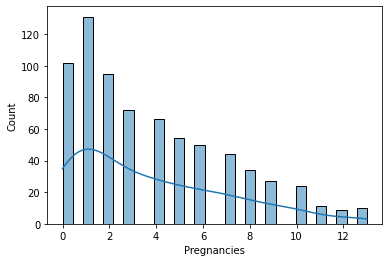

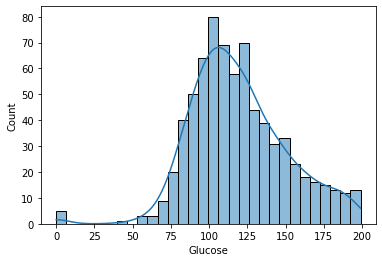

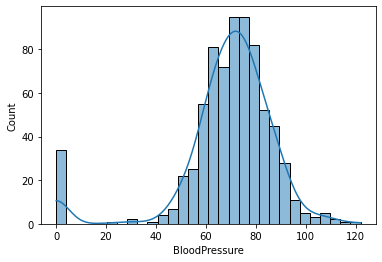

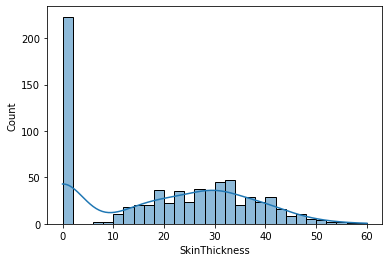

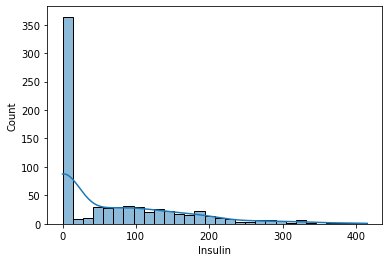

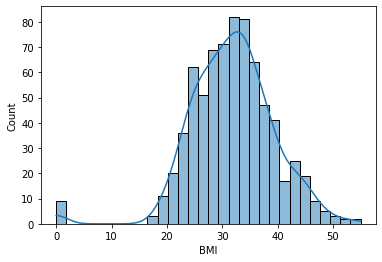

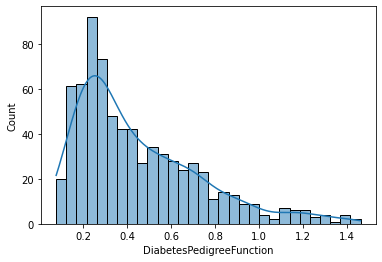

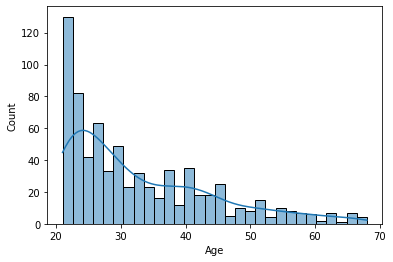

In [ ]:
for column in num_columns:
    sns.histplot(data=num_df, x=column, kde=True, bins=30)
    plt.show()

**Observations:**

- Pregnancies, Age, DiabetesPedigreeFunction are right skewed normally distributed.
- BMI, SkinThickness, BloodPressure and Glucose are following Gaussian Distribution
- Insulin is not following any distribution correctly.

Lets see the relation between each of the features with help of strip plot

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

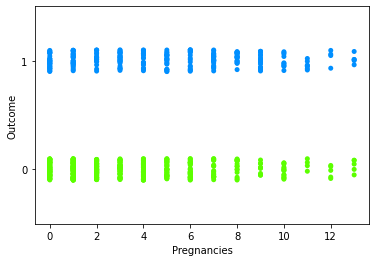

In [ ]:
sns.stripplot(data=df_processed, x='Pregnancies', y='Outcome', palette='gist_rainbow_r')

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

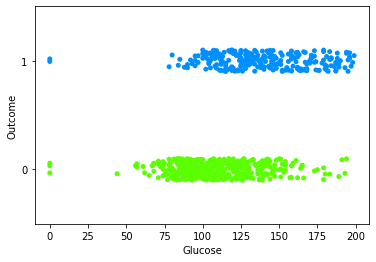

In [ ]:
sns.stripplot(data=df_processed, x='Glucose', y='Outcome', palette='gist_rainbow_r')

<AxesSubplot:xlabel='BloodPressure', ylabel='Outcome'>

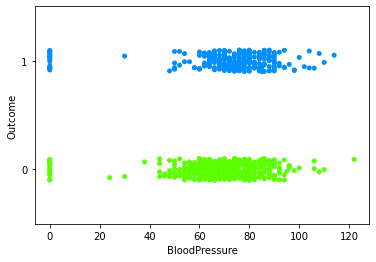

In [ ]:
sns.stripplot(data=df_processed, x='BloodPressure', y='Outcome', palette='gist_rainbow_r')

<AxesSubplot:xlabel='SkinThickness', ylabel='Outcome'>

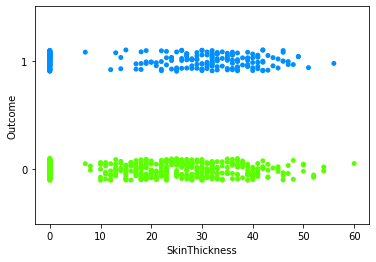

In [ ]:
sns.stripplot(data=df_processed, x='SkinThickness', y='Outcome', palette='gist_rainbow_r')

<AxesSubplot:xlabel='Insulin', ylabel='Outcome'>

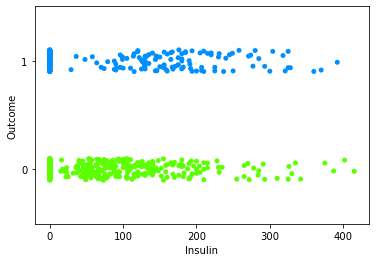

In [ ]:
sns.stripplot(data=df_processed, x='Insulin', y='Outcome', palette='gist_rainbow_r')

<AxesSubplot:xlabel='BMI', ylabel='Outcome'>

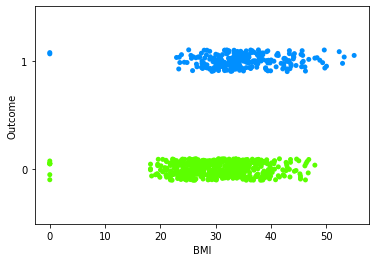

In [ ]:
sns.stripplot(data=df_processed, x='BMI', y='Outcome', palette='gist_rainbow_r')

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

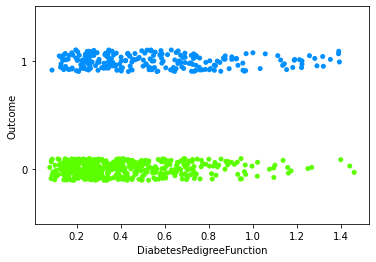

In [ ]:
sns.stripplot(data=df_processed, x='DiabetesPedigreeFunction', y='Outcome', palette='gist_rainbow_r')

<AxesSubplot:xlabel='Age', ylabel='Outcome'>

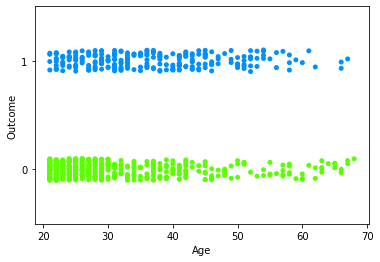

In [ ]:
sns.stripplot(data=df_processed, x='Age', y='Outcome', palette='gist_rainbow_r')

**Observations:**

- Diabetes negative people has Insulin within range of 20 to 200.
- For BMI greater than 20 and less than 50 most cases of Diabetes.
- For age less than 45 their are more cases of diabetes. 

# B. Model Building

## B.1 Define target and input vectors

Define target feature which is 'Outcome'

In [160]:
target_feature = df_processed['Outcome']

In [163]:
predictor_features = df_processed[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

## B.2 Create model

Creating our sequential model

In [164]:
model = Sequential()

Our model right now is empty as their are no layers into it as you can see

In [165]:
model.get_config()

{'name': 'sequential_1', 'layers': []}

## B.3 Adding layers to the model

### B.3.1 Adding first layer

Lets add some layers to our model and make it dense.

For each layer we have:

- Adding 4 neurons (units)
- Initialize weight of layers to 0 (kernel_initializer)
- Initialize bias to 0 (bias_initializer)
- Set the dimension of the neurons which is same as the features in our dataset, in this case 8 (input_dim)
- Set the activation method for the neurons to calculate bias and weights further, in this case 'relu' (activation)

In [166]:
model.add(Dense(units=4, kernel_initializer = "zeros", bias_initializer = "zeros", input_dim=8, activation = "relu"))  

We can see here that we have created the layer with 8 feature and 4 neuron

In [167]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_3_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_3',
    'trainable': True,
    'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'units': 4,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

Right now we have only one layer

In [168]:
model.get_layer 

<bound method Model.get_layer of <keras.engine.sequential.Sequential object at 0x0000029373DE2F40>>

Detail about our model till now.

In [169]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


**Observation:** We have one layer and it will give 4 output and 36 parameter

```8[feature] * 4[neurons] + 4[bias] == 36 parameter```

### B.3.2 Adding second layer

Lets add one more layer to the model

In [170]:
# Dimensionality will be auto detected as one layer already present in the model
model.add(Dense(units=4,
               activation ="relu",
               kernel_initializer = "zeros",
               bias_initializer = "zeros"
               ))

We have two layers in our model

In [171]:
model.get_layer

<bound method Model.get_layer of <keras.engine.sequential.Sequential object at 0x0000029373DE2F40>>

In [172]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_3_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_3',
    'trainable': True,
    'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'units': 4,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_4',
    'trainable': True,
    'dtype': 'float32',
    'units': 4,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 

Detail of our model till now

In [173]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


dense_1 is second layer of the model and it will give 4 output and has 20 parameter

``` 4[1st layer neuron] * 4[neurons] + 4[bias]```

### B.3.3 Adding final layer

Create last layer: it usually have single neuron and produces output

In [174]:
model.add(Dense(units=1,
               activation="sigmoid", # sigmoid function -> gives output in 0 and 1
               kernel_initializer="zeros",
               bias_initializer = "zeros" 
               ))

Final details of our model

In [175]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_3_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_3',
    'trainable': True,
    'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'units': 4,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_4',
    'trainable': True,
    'dtype': 'float32',
    'units': 4,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 

In [176]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


### B.3.4 Compile the model 

Define the loss function and optimizer for the model

In this case:
- Loss function is binary_crossentropy

In [177]:
model.compile(optimizer = Adam(), loss="binary_crossentropy")

### B.3.5 Training the model 

In [178]:
model.fit(predictor_features, target_feature)

23/23 [==============================] - 2s 3ms/step - loss: 0.6917


**Observations:** Our loss is 0.6917.

We will reset our weight and bias 100 times which is our epoch.

In [179]:
model.fit(predictor_features,target_feature, epochs=100)

Epoch 1/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6886
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6855
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6826
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6799
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6773
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6747
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6724
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6702
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6681
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6661
Epoch 11/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6643
Epoch 12/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6625
Epoch 13/100
23/23 [=================

Model trained for 100 times and the loss is minimized.

### B.3.6 Save the model 

In [181]:
model.save("../Diabetes-Predictor/Models/diabetes_model.h5")